Nearest Neighbor - Test Case 1
Total Cost: 1298840.8850906717
Opt Gap: 113817.4225626817%
Solve Time: 0.0519342422s
Tour Path: [0, 952, 177, 367, 770, 767, 483, 501, 798, 849, 721, 833, 674, 2, 928, 756, 62, 189, 631, 16, 446, 158, 358, 316, 276, 176, 937, 424, 597, 405, 745, 574, 310, 231, 540, 628, 997, 651, 11, 886, 613, 731, 467, 868, 349, 560, 904, 807, 994, 897, 279, 139, 110, 236, 760, 259, 523, 734, 840, 804, 311, 724, 789, 521, 257, 975, 780, 22, 323, 593, 334, 343, 905, 416, 186, 732, 679, 313, 256, 684, 337, 895, 657, 402, 72, 950, 835, 814, 654, 699, 404, 850, 150, 490, 837, 559, 872, 493, 601, 594, 82, 281, 135, 312, 730, 702, 224, 397, 149, 906, 516, 632, 210, 610, 779, 878, 658, 382, 452, 726, 320, 284, 223, 775, 659, 978, 713, 912, 51, 791, 74, 363, 920, 238, 671, 652, 269, 742, 511, 970, 432, 174, 44, 6, 283, 263, 974, 714, 498, 235, 282, 461, 422, 933, 55, 750, 330, 581, 71, 3, 736, 289, 764, 200, 626, 179, 299, 309, 329, 524, 718, 104, 462, 603, 743, 441, 685, 509, 3

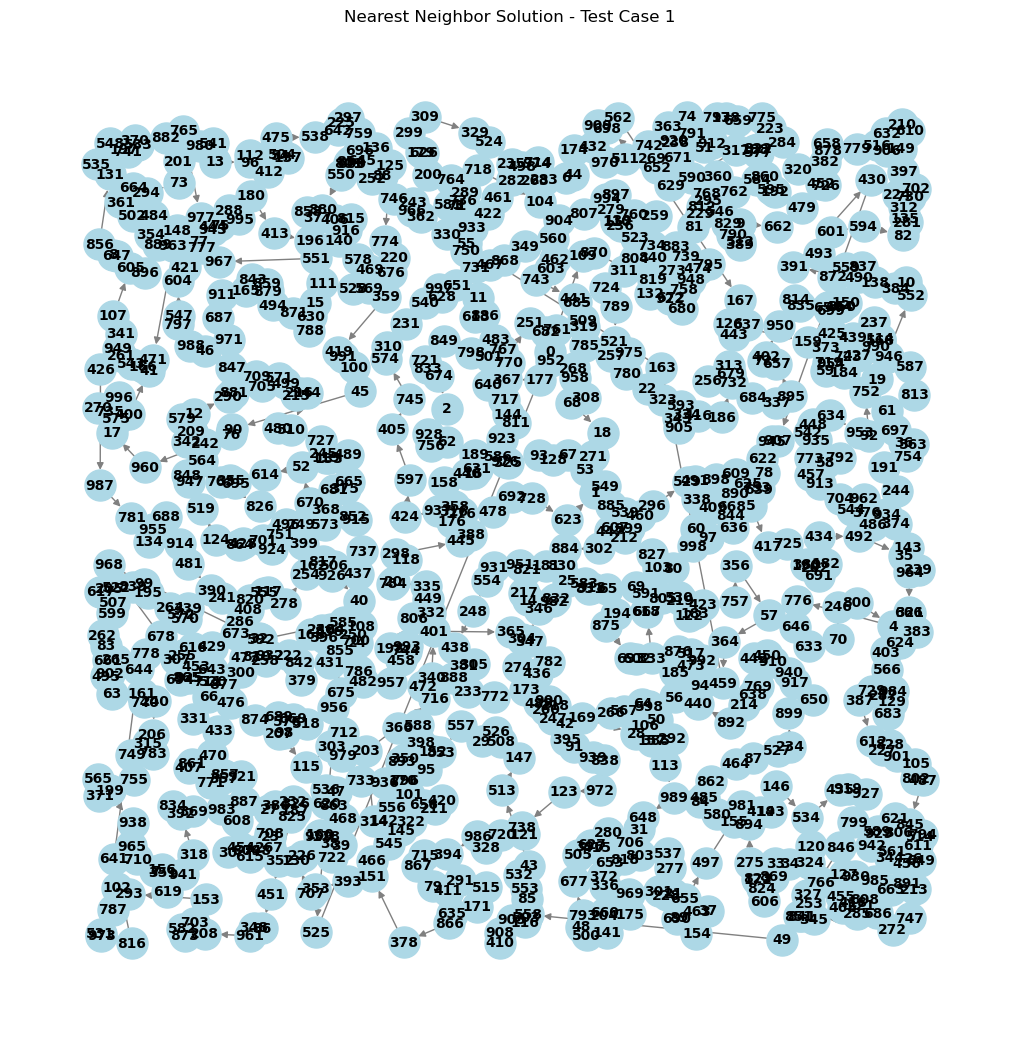

Nearest Neighbor - Test Case 2
Total Cost: 1232842.7473236234
Opt Gap: 303720.4808821587%
Solve Time: 0.0438070297s
Tour Path: [0, 795, 214, 838, 336, 909, 342, 198, 646, 139, 766, 499, 847, 578, 877, 304, 588, 240, 168, 500, 120, 348, 540, 42, 613, 691, 450, 914, 850, 625, 865, 831, 720, 562, 697, 371, 901, 112, 712, 616, 126, 604, 390, 812, 105, 880, 247, 894, 803, 949, 923, 589, 511, 486, 941, 283, 402, 305, 360, 849, 202, 819, 749, 467, 427, 43, 608, 603, 391, 85, 760, 521, 525, 833, 657, 302, 621, 6, 821, 802, 707, 644, 998, 582, 536, 835, 195, 294, 332, 787, 472, 550, 186, 165, 310, 461, 715, 947, 842, 975, 111, 36, 230, 630, 531, 926, 544, 14, 722, 813, 818, 320, 535, 634, 769, 688, 857, 57, 548, 675, 213, 19, 852, 201, 884, 504, 25, 7, 49, 118, 509, 786, 205, 881, 172, 468, 973, 986, 607, 750, 429, 163, 225, 93, 311, 489, 755, 73, 77, 315, 295, 11, 984, 594, 396, 354, 498, 356, 735, 403, 875, 129, 784, 636, 529, 566, 542, 632, 836, 910, 615, 770, 557, 331, 932, 990, 816, 157, 6

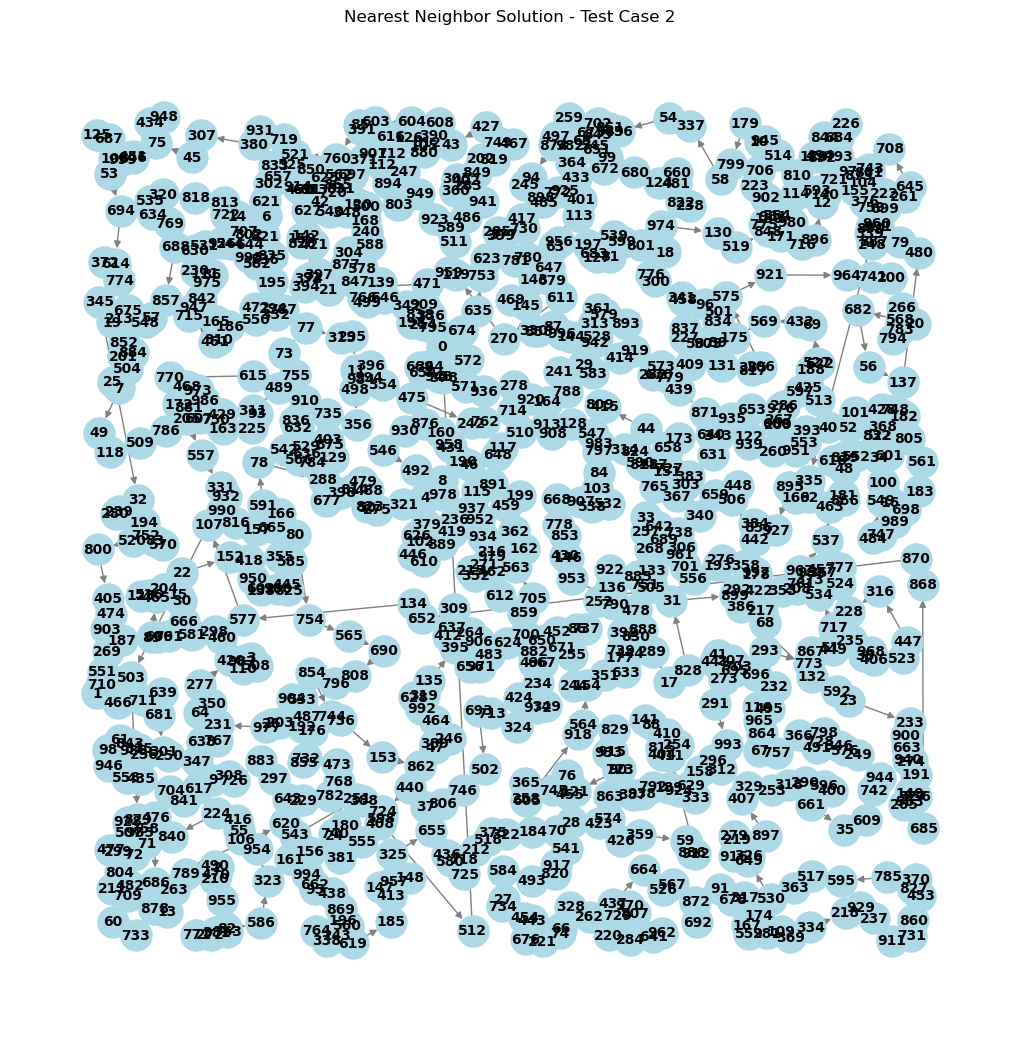

In [ ]:
import numpy as np
import time
from data_generation import generate_data
from visualizations import plot_tour_graph

def nearest_neighbor_solver_with_penalties(coords, time_windows, travel_time):
    num_cities = len(coords)
    visited = [False] * num_cities
    current_city = 0
    visited[current_city] = True
    route = [current_city]
    total_cost = 0
    current_time = 0

    while len(route) < num_cities:
        nearest_city = None
        min_distance = float('inf')

        for next_city in range(num_cities):
            if not visited[next_city] and travel_time[current_city, next_city] < min_distance:
                nearest_city = next_city
                min_distance = travel_time[current_city, next_city]

        # Travel
        current_time += min_distance

        # Penalties
        earliest, latest = time_windows[nearest_city]
        penalty = 0
        if current_time < earliest:
            penalty += earliest - current_time
            current_time = earliest
        elif current_time > latest:
            penalty += current_time - latest

        total_cost += min_distance + penalty
        visited[nearest_city] = True
        route.append(nearest_city)
        current_city = nearest_city

    # Return to origin
    return_distance = travel_time[current_city, route[0]]
    current_time += return_distance
    earliest, latest = time_windows[route[0]]
    penalty = 0
    if current_time < earliest:
        penalty += earliest - current_time
        current_time = earliest
    elif current_time > latest:
        penalty += current_time - latest

    total_cost += return_distance + penalty
    route.append(route[0])

    return route, total_cost

def convert_route_to_adjacency_matrix(route, num_cities):
    adj_matrix = np.zeros((num_cities, num_cities))
    for i in range(len(route) - 1):
        adj_matrix[route[i], route[i + 1]] = 1
    return adj_matrix

if __name__ == "__main__":
    num_cases = 2
    num_cities = 1000  # Adjusted for testing larger graphs
    lagrangian_lower_bounds = [1140.16, 405.78]  # Example lower bounds

    for test_id in range(num_cases):
        coords, time_windows, travel_time = generate_data(num_cities, seed=test_id)

        # Time the solver execution
        start_time = time.time()
        nn_route, nn_cost = nearest_neighbor_solver_with_penalties(coords, time_windows, travel_time)
        solve_time = time.time() - start_time

        lag_lb = lagrangian_lower_bounds[test_id]
        opt_gap = ((nn_cost - lag_lb) / lag_lb) * 100

        # Display results
        print(f"Nearest Neighbor - Test Case {test_id + 1}")
        print(f"Total Cost: {nn_cost:.10f}")
        print(f"Opt Gap: {opt_gap:.10f}%")
        print(f"Solve Time: {solve_time:.10f}s")
        print(f"Tour Path: {nn_route}")

        # Convert route to adjacency matrix and plot (not part of timing)
        nn_adj_matrix = convert_route_to_adjacency_matrix(nn_route, num_cities)
        plot_tour_graph(coords, nn_adj_matrix, title=f"Nearest Neighbor Solution - Test Case {test_id + 1}")
